# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
 
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    url='https://drive.google.com/file/d/1gqWeKM-K0TPo1M3GsDYRkU97NKyRW4eG/view?usp=sharing'
    url='https://drive.google.com/uc?id=' + url.split('/')[-2]
    data = pd.read_csv(url,sep='\t')

In [73]:
pd.set_option('display.max_columns', None)
data.head() #рассмотрим первые несколько строк файла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [74]:
data.info() #Выведим основную информацию по файлу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [75]:
data.describe() #статистические данные фрейма

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


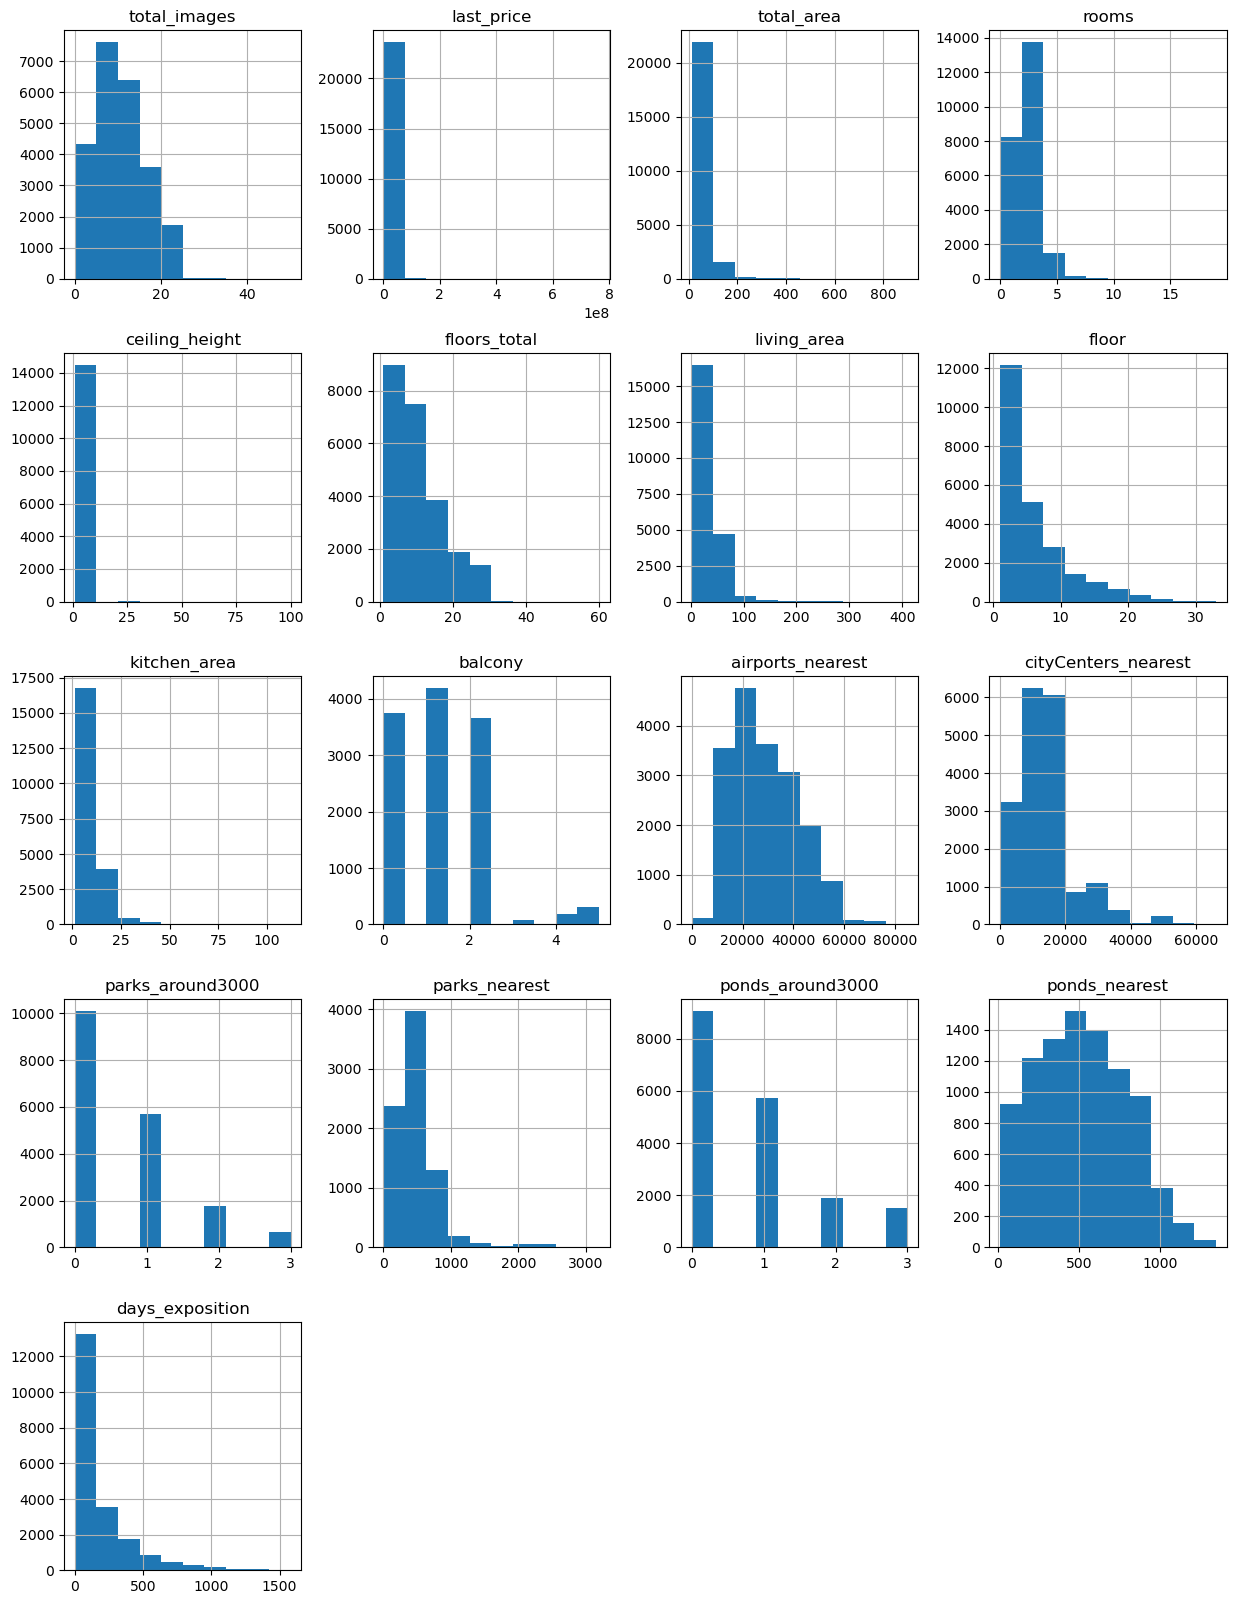

In [76]:
data.hist(figsize=(15, 20)); #Гистрограммы для всех данных

### Предобработка данных

In [77]:
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<b> В данных присутсвует множество пропусков, надо найти что из этого мы можем заполнить, а что придется отбросить

In [78]:
data['balcony'] = data['balcony'].fillna(0) #Скорее всего если не указано кол-во балконов - значит их нет

In [79]:
#Данные из locality_name никак не востановить, так что их лучше удалить
data = data[data['locality_name'].notna()].reset_index(drop=True)

In [80]:
def fill_column (null_col): #напишем функцию которая будет подставлять вместо пропусков значения медианы по городам
    data[null_col] = data[null_col].fillna(data.groupby('locality_name')[null_col].transform('median'))
    data[null_col] = data[null_col].fillna(data[null_col].median()) 
    return(data[null_col])

In [81]:
pd.options.mode.chained_assignment = None
fill_column('ceiling_height');


**После выполения функции осталось 121 пропуск - в некоторых поселках отсуствует информация по высоте потолков поэтому заполняем ячейки медианой по всему списку**

In [82]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [83]:
#Заполним пропуски площади квартир медианными значениями
data['living_area'] = data['living_area'].fillna(data['total_area'].multiply(data['living_area'].median()\
                                                                             /data['total_area'].median()))

In [84]:
#Заполним пропуски площади кухни медианными значениями
fill_column('kitchen_area');
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'].multiply(data['kitchen_area'].median()\
                                                                             /data['total_area'].median()))

In [85]:
#Заполним пропуски высотности зданий медианными значениями
fill_column('floors_total')
data.loc[data['floor']>data['floors_total'], 'floor'] = data['floors_total']

In [86]:
data[(data['airports_nearest'].isna() & data['cityCenters_nearest'].isna() \
      & data['parks_nearest'].isna() & data['ponds_nearest'].isna())]
#Как мы можем заметить данные по 4 столбцам airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest пропали в
#одних и тех же строках, возможно этой сбой при передаче данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.400000,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.430000,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.60,5.0,30.000000,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.56,9.0,18.923077,2,NaN,False,False,8.35,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23634,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,NaN,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23643,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.60,5.0,17.500000,4,NaN,False,False,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23646,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.000000,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23647,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.700000,1,NaN,False,False,8.15,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#Заполним пропуски расстояния кол-ва парков 0, если не указаны - скорее всего нет
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [88]:
#Заполним пропуски расстояния кол-ва водоемов 0, если не указаны - скорее всего нет
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [89]:
#Заполним пропуски расстояния кол-ва водоемов 0, если не указаны - скорее всего нет
data['is_apartment'] = data['is_apartment'].fillna(0)

In [90]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [91]:
data.loc[data['days_exposition'].isna(),'first_day_exposition'];

**Данные в days_exposition в большей части пропущены в новых объявлениях, так что пока можно оставить эти пропуски**

In [92]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

<b> 
    Строки locality_name я удалил, так как данные заменить не возможно, а удаление строк не скажется на результатах исследования
    Остальные строки я востановил медианными значениями

**Изменим тип столбцов и удалим дубликаты**

In [93]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#Приведем время к обычному виду

In [94]:
#привидем данные к int
data_format = ['last_price','floors_total','balcony','parks_around3000','ponds_around3000']
data[data_format] = data[data_format].astype('int')

**Дубликаты**

In [95]:
data['locality_name'] = data['locality_name'].str.lower() 

In [96]:
data.duplicated().sum() #Явных дубликатов нет

0

In [97]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [98]:
#Удалим неявные дубликаты
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок')

In [99]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [100]:
data.duplicated().sum()

0

**Удалим аномальные значения**

In [101]:
data.describe(percentiles=[.01,0.5,0.99]) #

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.733775,10.672262,34.612450,5.883087,10.465108,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.010372,6.585538,22.386704,4.866442,5.631948,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
1%,0.000000,1.000000e+06,25.174500,1.000000,2.500000,2.000000,13.000000,1.000000,5.000000,0.000000,9412.150000,1327.380000,0.000000,24.000000,0.000000,35.000000,4.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.600000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
99%,20.000000,3.600000e+07,197.557000,5.000000,3.650000,26.000000,122.000000,23.000000,35.000000,5.000000,58514.750000,50065.860000,3.000000,2102.000000,3.000000,1159.000000,1069.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Значения которые мы считаем аномальными:\
Уберем в last_price цены выше 100 млн и ниже 100 тысяч рублей\
В total_area убирем значения меньше 20 и больше 250\
В rooms можно не брать больше 7 комнат\
ceiling_height меньше 2 и больше 4 можно удалить\
floors больше 26\
living_area меньше 5 и больше 150\
kitchen_area меньше 4 и больше 50\
balcony больше 4\
airports_nearest меньше 5 и больше 80.000\
cityCenters_nearest больше 55.000\
parks_nearest меньше 10 и больше 2000\
ponds_nearest меньше 20 и больше 1200\**

In [102]:
#Создадим новый фрейм с удалением аномальных значений
df_new = data.query('1e8>last_price>100000 and 20<total_area<250 and rooms<7 and 2<ceiling_height<4 \
    and 5<living_area<150 and 4<kitchen_area<50 and balcony<4 and 5<airports_nearest<80000 and cityCenters_nearest<55000\
    and 10<parks_nearest<2000 and 20<ponds_nearest<1200 and floors_total<26')
df_new = df_new[df_new['floor']<26]

In [103]:
(len(data)-len(df_new))/len(data)*100 #найдем процент данных которые отфильтровались

81.56448202959831

Аномальными были только 19% данных, от которых мы избавились

### Добавьте в таблицу новые столбцы со следующими параметрами

In [104]:
df_new['price_one_meter'] = df_new['last_price']/df_new['total_area']
#Добавим столбец с данными про стоимость одного квадратного метра

In [105]:
df_new['day_publication'] = df_new['first_day_exposition'].dt.weekday 
#Найдем день недели публикации объвляения Понедельник — день под номером 0, а воскресенье — шестой день

In [106]:
df_new['month_publication'] = df_new['first_day_exposition'].dt.month
#Найдем месяц публикации объвляения

In [107]:
df_new['year_publication'] = df_new['first_day_exposition'].dt.year
#Найдем год публикации объвляения

In [108]:
#Напишем функцию для нахождения этажа
def categorize_income(income):
    if income['floor']==1:
        return 'первый'
    elif income['floor']==income['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [109]:
df_new['floor_number'] = df_new.apply(categorize_income,axis=1)
#Найдем этаж квартиры

In [110]:
df_new['cityCenters_nearest_km'] = round(df_new['cityCenters_nearest']*0.001).astype(int)
#Приведем значения до центра города в км

In [111]:
df_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,day_publication,month_publication,year_publication,floor_number,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,0,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.300000,4,0,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,2.70,14,91.730769,9,0,False,False,9.9,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,0,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.300000,3,0,False,False,8.5,0,санкт-петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой,14


### Проведите исследовательский анализ данных

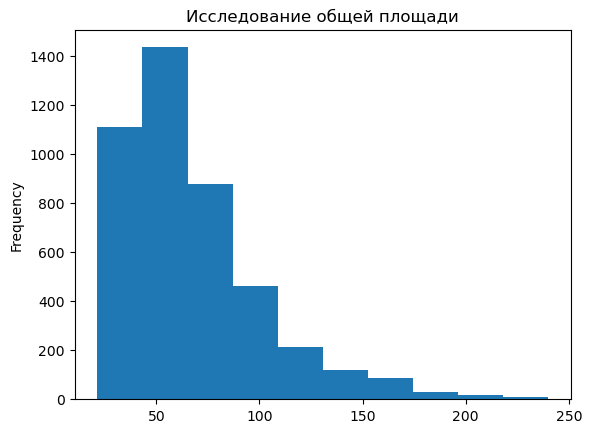

In [112]:
df_new['total_area'].plot(kind='hist',title='Исследование общей площади'); #Изучим общую площадь

**Видно, что в среднем площадь равна 20-50 м2**

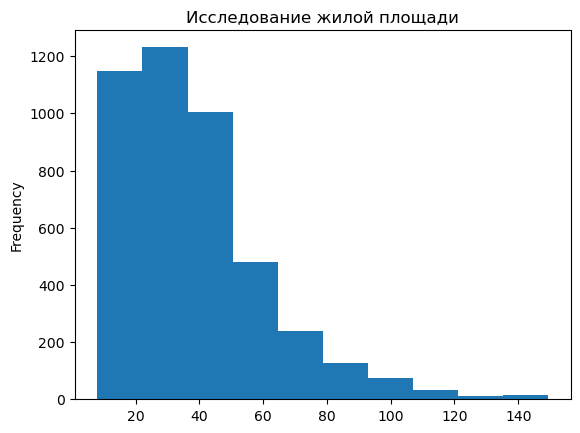

In [113]:
df_new['living_area'].plot(kind='hist',title='Исследование жилой площади'); #Изучим жилую площадь

**Пик приходится на 20-30 м2**

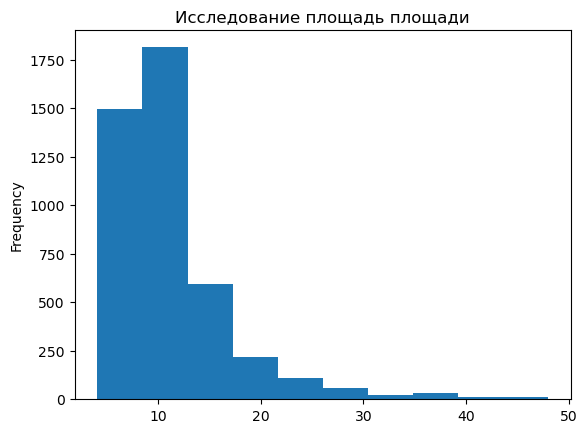

In [114]:
df_new['kitchen_area'].plot(kind='hist',title='Исследование площадь площади'); #Изучим площадь кухни

**Намного меньше разброс, редко делают кухню площадью больше 30м2**

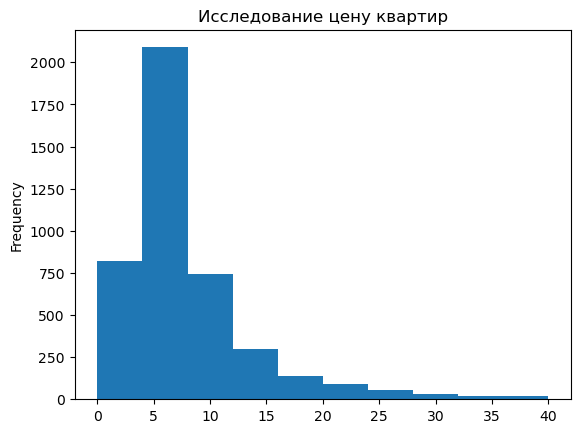

In [115]:
(df_new['last_price']/1000000).plot(kind='hist',title='Исследование цену квартир',range=(0,40)); 
#Изучим цену квартир

**Видно, что квартиры свыше 30млн уже редкость, в основном все квартиры находятся в районе 7-10 млн**

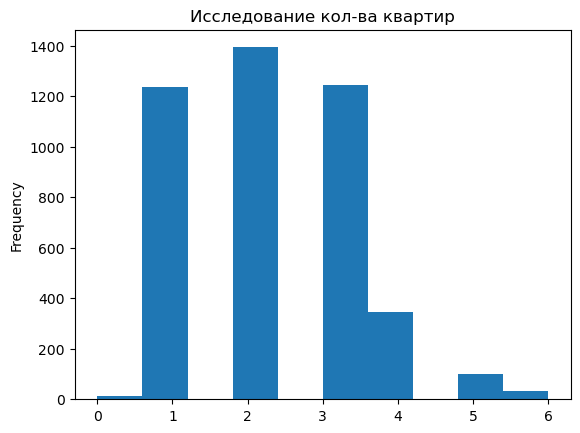

In [116]:
df_new['rooms'].plot(kind='hist',title='Исследование кол-ва квартир'); #Изучим кол-во комнат

**Чаще всего встречаются квартиры с 1-2-3 комнатами**

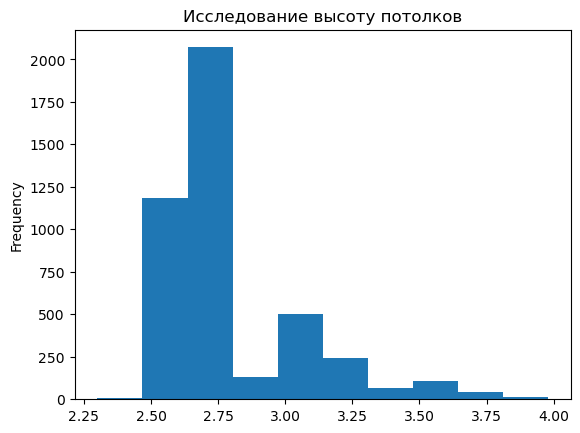

In [117]:
df_new['ceiling_height'].plot(kind='hist',title='Исследование высоту потолков'); #Изучим высоту потолков

**Высота потолков 2.6-2.8 самый распространенный вариант**

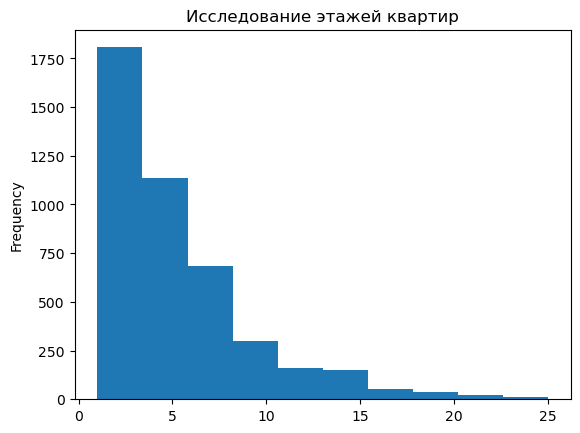

In [118]:
df_new['floor'].plot(kind='hist',title='Исследование этажей квартир'); #Изучим этаж квартиры

**Большинство квартир на продаже находятся до 5 этажа**

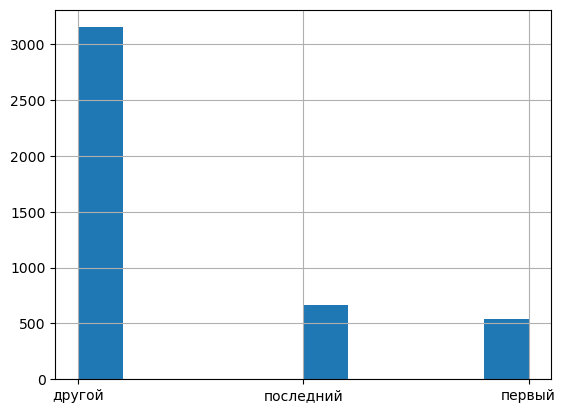

In [119]:
df_new['floor_number'].hist(); #Изучим этаж квартиры

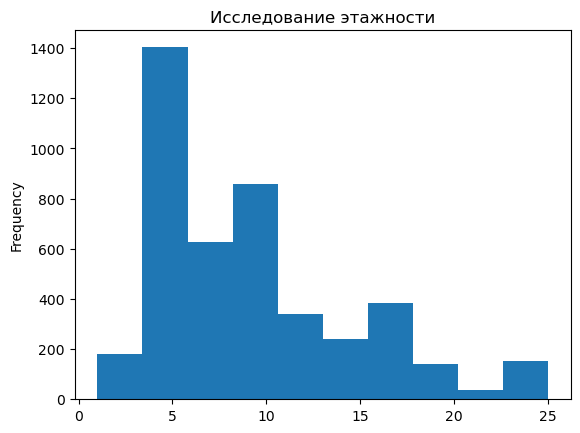

In [120]:
df_new['floors_total'].plot(kind='hist',title='Исследование этажности'); #Изучим этажность зданий

**Чаще всего встречаются дома с 3-5 этажами и 8-11**

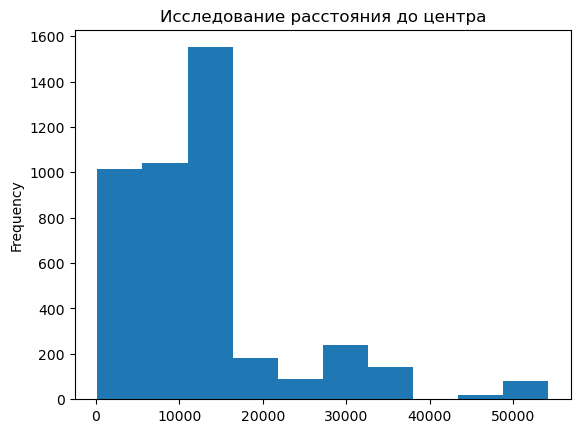

In [121]:
df_new['cityCenters_nearest'].plot(kind='hist',title='Исследование расстояния до центра'); #Изучим рассояние до центра

**Чаще всего квартиры на расстояние от 11км до 16км до центра**

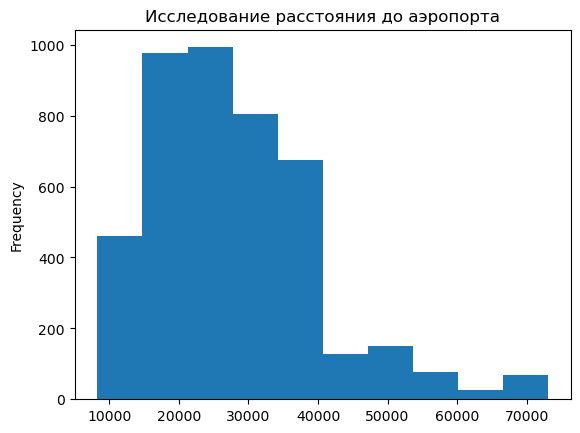

In [122]:
df_new['airports_nearest'].plot(kind='hist',title='Исследование расстояния до аэропорта'); #Изучим рассояние до аэропорта

**Чаще всего квартиры на расстояние 20-27км до аэропорта**

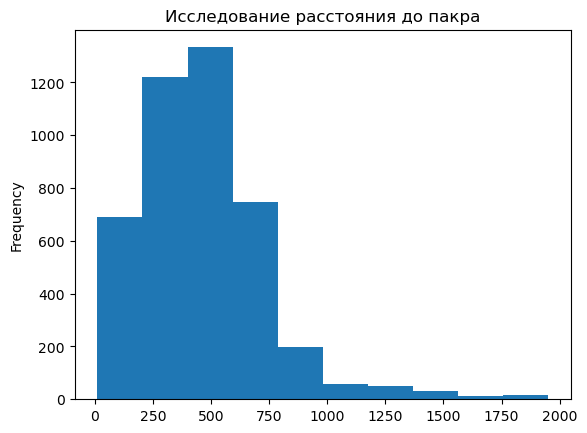

In [123]:
df_new['parks_nearest'].plot(kind='hist',title='Исследование расстояния до пакра'); #Изучим рассояние до парка

**С парками все замечательно, почти у всех объявлений 500 м до парка**

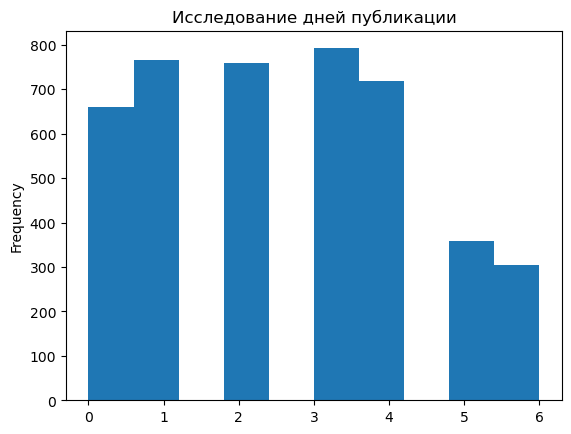

In [124]:
df_new['day_publication'].plot(kind='hist',title='Исследование дней публикации'); #Изучим день публикации

**Публикации распределились равномерно, кроме субботы и воскресенья**

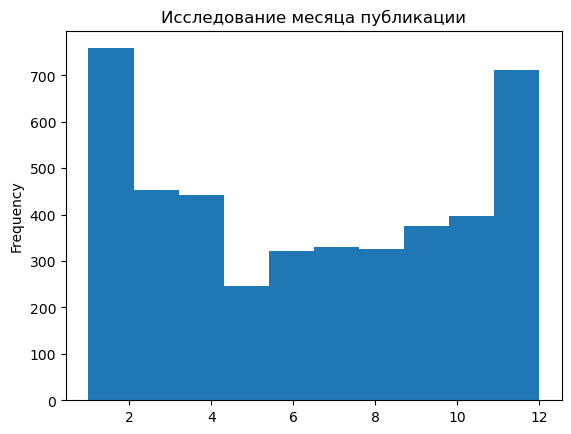

In [125]:
df_new['month_publication'].plot(kind='hist',title='Исследование месяца публикации'); #Изучим месяц публикации

**Чаще всего публикуют в Январе и Декабре, и есть спад в мае**

*Изучим насколько быстро продовались квартиры*

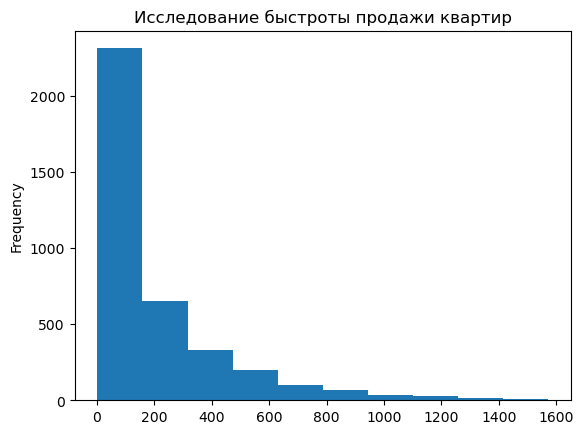

In [126]:
df_new['days_exposition'].plot(kind='hist',title='Исследование быстроты продажи квартир');

In [127]:
print('Медиана длительности продажи квартир', df_new['days_exposition'].median())
print('Медиана длительности продажи квартир', df_new['days_exposition'].mean())

Медиана длительности продажи квартир 108.5
Медиана длительности продажи квартир 199.72269807280514


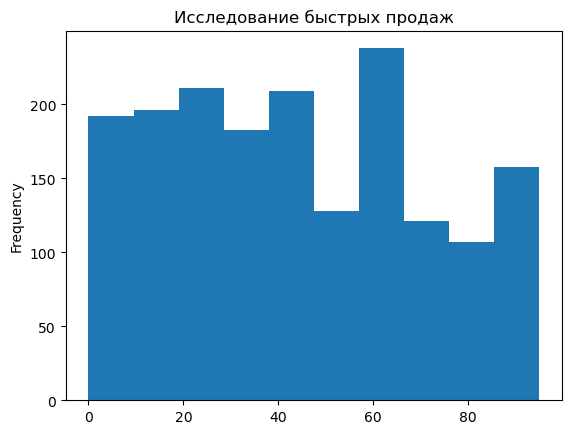

In [128]:
df_new['days_exposition'].plot(kind='hist',title='Исследование быстрых продаж',range=(0,95));

**В среднем продажа занимает 94.5 дней. Можно считать слишком быстрыми продажи до 15 дней, а слишком долгими продажи которым уже больше 800 дней**\
**Возможно что пики на 45 и 60 днях связаны с правилами площадки (Правилами продвижения публикаций или их проверки)**

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**

,last_price,total_area
last_price,1.000000,0.723988
total_area,0.723988,1.000000


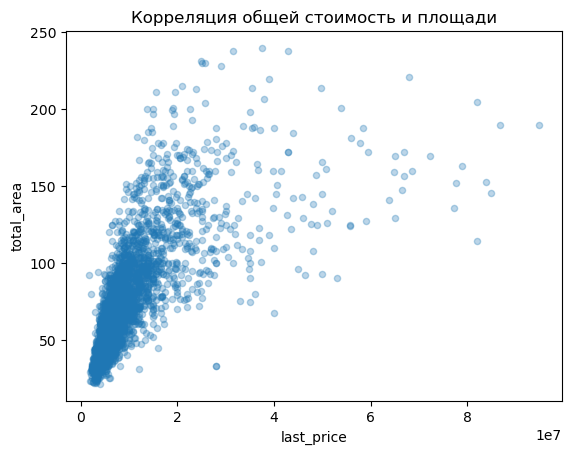

In [129]:
df_new.plot(x='last_price',y='total_area',kind='scatter',alpha=0.3,title='Корреляция общей стоимость и площади');
df_new[['last_price','total_area']].corr()

**Можно заметить, что цена почти напрямую коррелирует с ее площадью**

,last_price,living_area
last_price,1.000000,0.646568
living_area,0.646568,1.000000


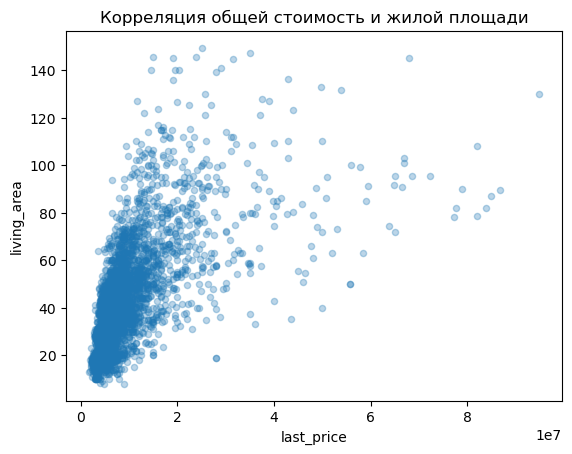

In [130]:
df_new.plot(x='last_price',y='living_area',kind='scatter',alpha=0.3,title='Корреляция общей стоимость и жилой площади');
df_new[['last_price','living_area']].corr()

**Можно заметить, что жилая площадь уже меньше влияет на стоимость, чем полная площадь, но зависимость есть, хоть и появляются аномальные значения**

,last_price,kitchen_area
last_price,1.000000,0.471728
kitchen_area,0.471728,1.000000


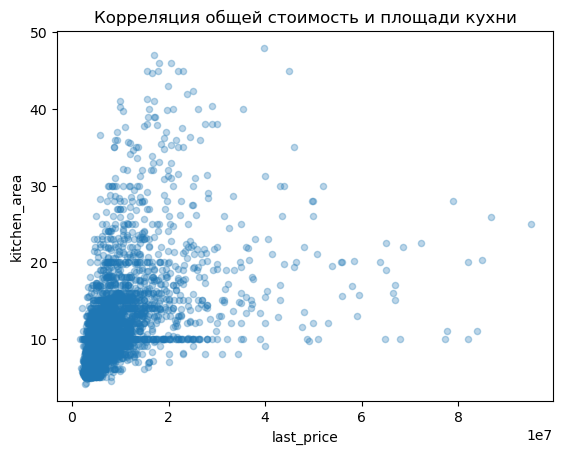

In [131]:
df_new.plot(x='last_price',y='kitchen_area',kind='scatter',alpha=0.3,title='Корреляция общей стоимость и площади кухни');
df_new[['last_price','kitchen_area']].corr()

**Можно заметить, что  площадь кухни меньше влияет на стоимость , чем полная площадь, но зависимость есть, хоть и появляются аномальные значения**

,last_price,rooms
last_price,1.000000,0.446133
rooms,0.446133,1.000000


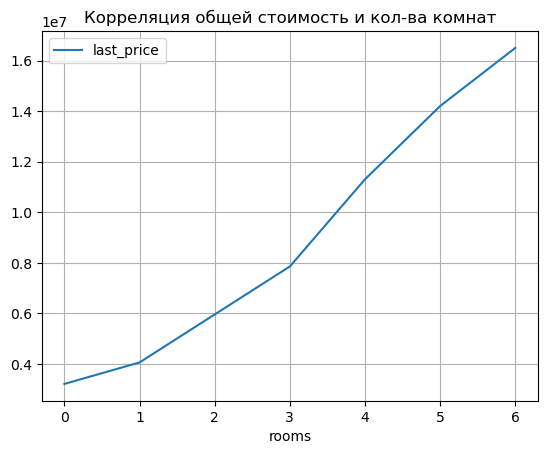

In [132]:
df_new.pivot_table(index='rooms',values='last_price',aggfunc='median').plot(y='last_price',grid=True,\
                                                                            title='Корреляция общей стоимость и кол-ва комнат')
df_new[['last_price','rooms']].corr()

**Чем больше комнат - тем выше цена квартиры**

,last_price
last_price,1.0


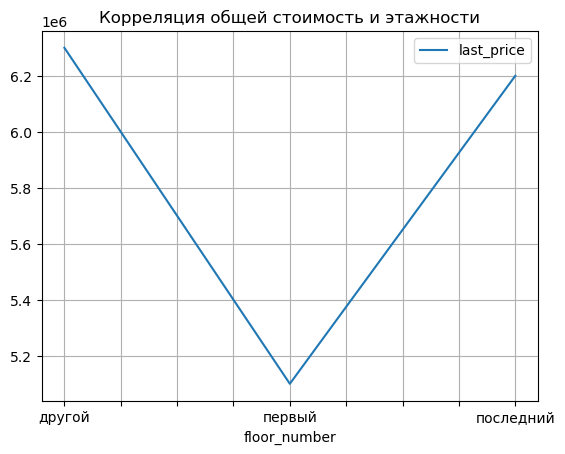

In [133]:
df_new.pivot_table(index='floor_number',values='last_price',aggfunc='median').plot(y='last_price',grid=True\
                                                                                   ,title='Корреляция общей стоимость и этажности')
df_new[['last_price','floor_number']].corr()

,last_price,floor
last_price,1.000000,0.015189
floor,0.015189,1.000000


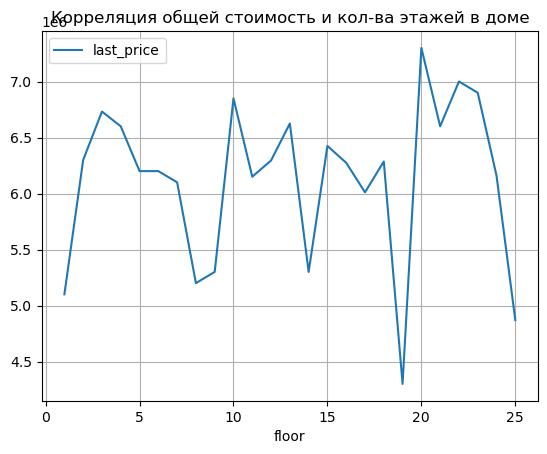

In [134]:
df_new.pivot_table(index='floor',values='last_price',aggfunc='median').plot(y='last_price',grid=True\
                                                                            ,title='Корреляция общей стоимость и кол-ва этажей в доме')
df_new[['last_price','floor']].corr()

**Первый и последний этаж сильно снижает стоимость квартиры, если не учитывать эти этажи, то в среднем чем выше этаж - тем стоимость квартиры больше**

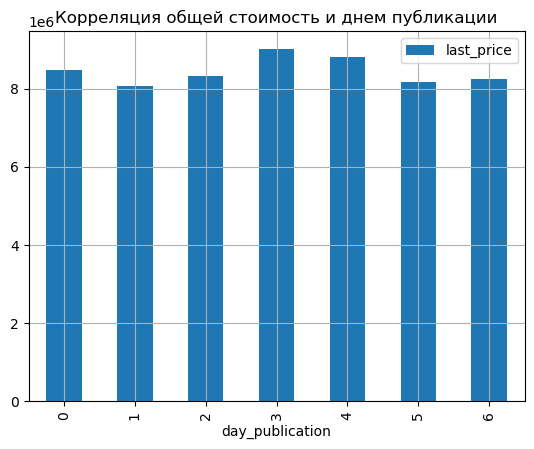

In [135]:
df_new.pivot_table(index='day_publication',values='last_price').plot(kind='bar',y='last_price',grid=True,\
                                                                     title='Корреляция общей стоимость и днем публикации');

**Интересно заметить, что в четверг выставляют самые дорогие квартиры, а вот в пятницу-воскресенье и еще в вторник наоборот более дешевые**

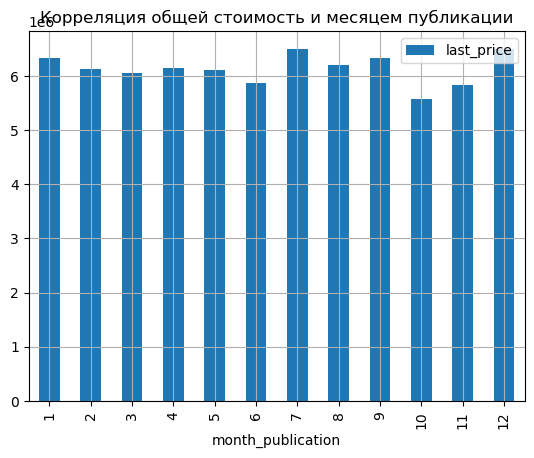

In [136]:
df_new.pivot_table(index='month_publication',values='last_price',aggfunc='median').plot(kind='bar',y='last_price',grid=True,\
                                                                       title='Корреляция общей стоимость и месяцем публикации');

**В Декабре выставляют самые дорогие квартиры, а вот в октябре наоборот более дешевые**

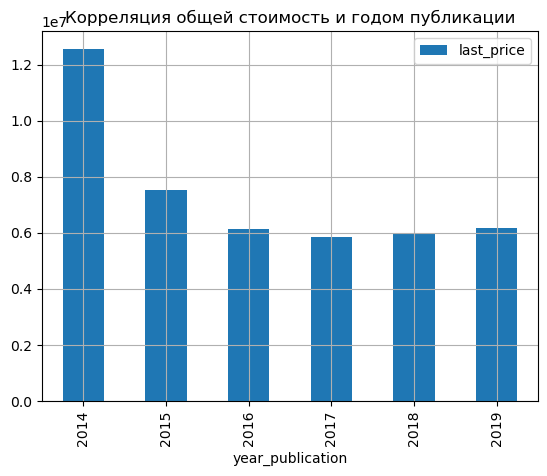

In [137]:
df_new.pivot_table(index='year_publication',values='last_price',aggfunc='median').plot(kind='bar',y='last_price',grid=True\
                                                                      ,title='Корреляция общей стоимость и годом публикации');

**Цена на квартиры снижалась с 2014 года, достигла свеого дна в 2018 и после этого начала немного расти**

**Можно сделать вывод, что больше всего влияет на стоимость такие факторы как:\
1)Общая площадь\
2)Комнаты\
3)Этаж**

In [138]:
top_location_table = df_new.pivot_table(index='locality_name',values='price_one_meter',aggfunc=['count','mean'])
top_location_table.columns = ['count','mean']
top_location_table = top_location_table.sort_values('mean',ascending=False).head(10)
top_location_table.style.background_gradient(cmap='RdYlGn')

,count,mean
locality_name,,
санкт-петербург,3839,122662.838114
сестрорецк,70,109117.619755
пушкин,126,106024.696047
зеленогорск,14,104801.396841
павловск,24,90949.238856
поселок стрельна,13,88396.075212
петергоф,109,85851.852068
поселок парголово,6,83381.367423
красное село,9,80271.061756


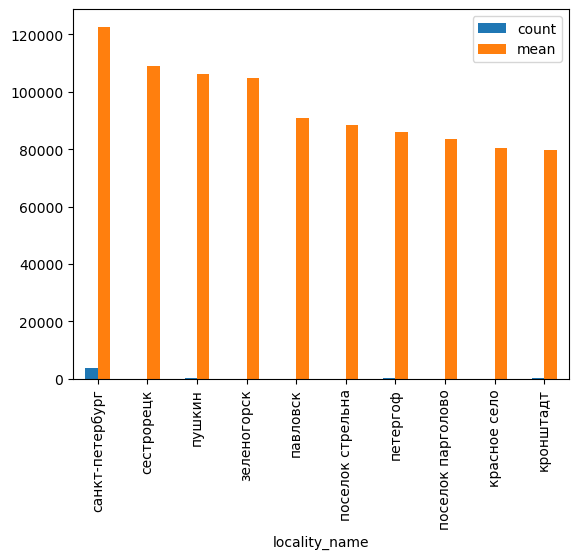

In [139]:
top_location_table.sort_values('mean',ascending=False).plot(kind='bar');

**Видно, что самый дешевый кв.метр в Выборге, а вот в Пушкине и Санкт-Петербургу и Сестрорецке самый дорогие**

In [140]:
saint_pet_centre = df_new[df_new['locality_name']=='санкт-петербург']
price_km = saint_pet_centre.pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc=['count','mean'])
price_km.columns = ['count','mean']
price_km = price_km.sort_values('cityCenters_nearest_km')
price_km.style.background_gradient(cmap='RdYlGn')

,count,mean
cityCenters_nearest_km,,
0,20,22609081.400000
1,129,13695124.023256
2,219,13457708.127854
3,202,10346580.945545
4,236,11253495.135593
5,202,10986056.475248
6,277,13091067.841155
7,191,17359596.408377
8,246,10358324.060976


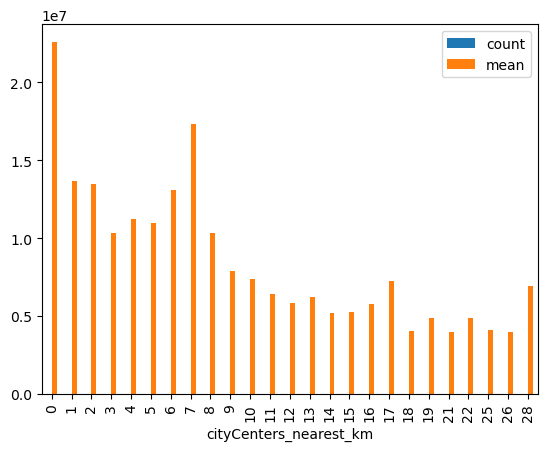

In [141]:
price_km.sort_values('cityCenters_nearest_km').plot(kind='bar');

**Как мы видим, чем ближе к центру, тем дороже квартиры и по отдолению от центра они уменьшаются в цене\
Через 8 км начинается спад цены - связанный с окончанием центра города**

### Общий вывод

**Было проведено исследование для нахождения зависимости цены квартир от различных факторов.**

**Что проверялось?**
1. Зависимость цены квартиры от:
      - общей площади;
      - жилой площади;
      - площади кухни;
      - количество комнат;
      - типа этажа, на котором расположена квартира (первый, последний, другой);
      - даты размещения (день недели, месяц, год);
  
2. Нахождения самых дорогих квадратных метров в районе Санкт-Петербурга

3. Нахождения зависимости цены в Санкт-Петербурге в зависимости от центра города

**В результате исследования можно сделать выводы:**
1. Больше всего на цену квартиры влияет ее площадь, площадь кухни и жилая площадь (корреляция 0.723988, 0.646568,0.471728 соответственно), дальше идет зависимость цены от кол-ва комнат (корреляция составила 0.441329). Также можно отметить этажи, на первом цены намного ниже, а вот на последнем ниже, но нет огромной разницы. Остальные факторы влияют на цену квартиры намного меньше.

2. В Санкт-Петербурге/Пушкине/Сестрорецке самые дорогие квадратные метры из всех рассмотренных поселков/городов

3. Чем ближе к центру - тем дороже квартиры. Но бывают исключения, скорее всего это хорошие районы, в которых на стоимость влияют еще многие факторы.

**Общие выводы:**
1. Для более точного исследования требуется изучить проблему с пропусками в столбце is_apartment. Также следует изучить причину пропажи данных в airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest.

2. Нужно больше данных о дорогих квартирах (свыше 100 млн) чтобы исследовать данные о ценных люксовых квартирах

3. Следует создать фильтрацию объявлений, для их дополнительной проверки. Потому что существуют объявления с аномальными значениями. Они могут являться мошенническими или неверно заполненными

4. Нужно больше данных о Зеленогорске, так как этот город может входить в районы с высокой стоймостью кв.м но из-за малого кол-ва объявлений нельзя утверждать наверняка